In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls

Telco-Customer-Churn.csv
Teleco Chrun Prediction.ipynb


In [3]:
churn=pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
#to check head od data
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.shape

(7043, 21)

Here 7043 rows denoting no of customers on which this data is surveyed and 21 columns denote the features to predict churn including Target variable.

In [6]:
# check stats
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we can see that mostly tenure values lies near 24 and monthly charges lies around 30. Minimum monthly charges is 18 and max 118.

In [7]:
# check information about dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check if there is any null values
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is not any null values.

In [9]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


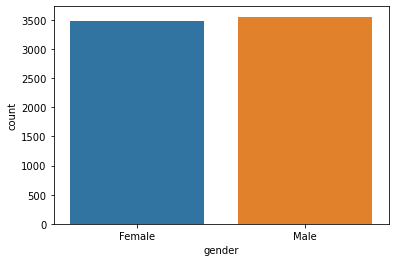

In [10]:
sns.countplot('gender',data=churn)
plt.show()

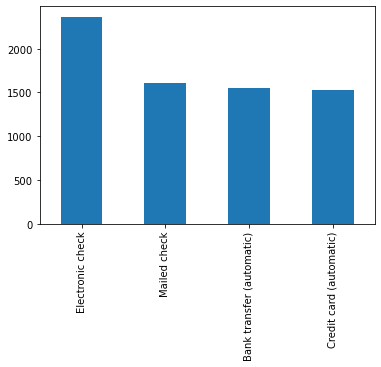

In [11]:
churn['PaymentMethod'].value_counts().plot(kind='bar')
plt.show()

mostly payment mode is Electronic check.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


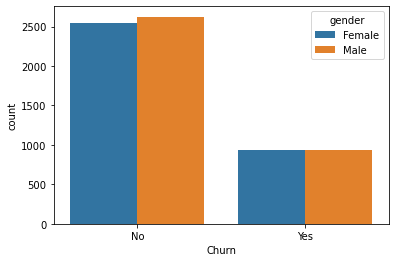

In [12]:
sns.countplot('Churn', data=churn, hue='gender')
plt.show()

Here we can see that female is most stable than male.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


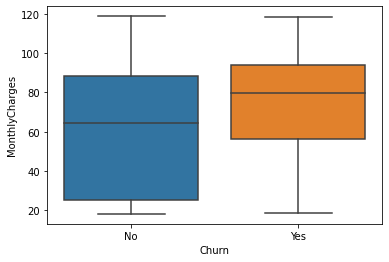

In [13]:
sns.boxplot('Churn', 'MonthlyCharges', data=churn)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


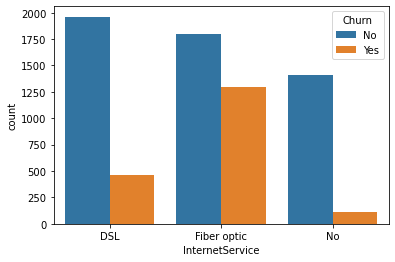

In [14]:
sns.countplot('InternetService', data=churn, hue='Churn')
plt.show()

those customers who use fiber optic InternetService is actually churn most.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


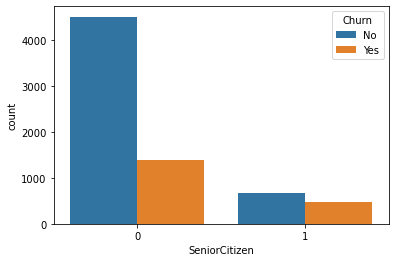

In [15]:
sns.countplot('SeniorCitizen', data=churn, hue='Churn')
plt.show()

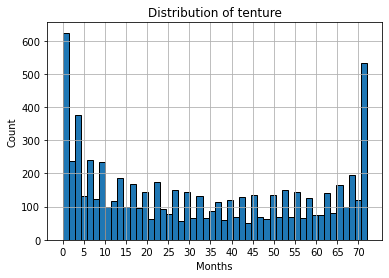

In [16]:
plt.hist('tenure', data=churn, bins=50,ec='k')
plt.grid()
plt.xticks(range(0,72,5))
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Distribution of tenture")
plt.show()

Here we can see that mostly customers have been with the company for just one month. but Some customers have a contract of 72 months.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


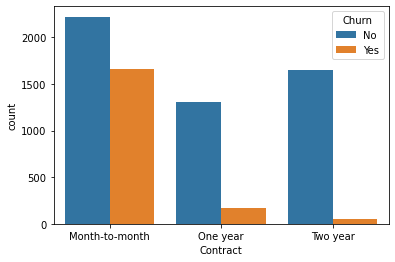

In [17]:
sns.countplot("Contract", data=churn, hue='Churn')
plt.show()

Here we can see from above plot, mostly customers are churn who have month-to month contract, long term customers are less.

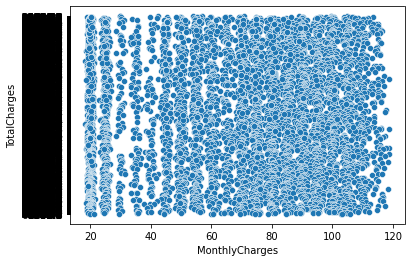

In [18]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges', data=churn)
plt.show()

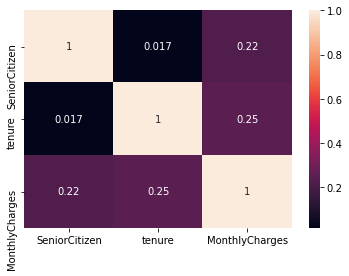

In [19]:
sns.heatmap(churn.corr(), annot=True)
plt.show()

In [20]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
features=churn.drop('Churn', axis=1)
target=churn['Churn']

In [65]:
target=le.fit_transform(target)

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
le=LabelEncoder()
churn['gender']=le.fit_transform(churn['gender'])
churn['Partner']=le.fit_transform(churn['Partner'])
churn['Dependents']=le.fit_transform(churn['Dependents'])
churn['PhoneService']=le.fit_transform(churn['PhoneService'])
churn['Churn']=le.fit_transform(churn['Churn'])

In [67]:
cat=features.select_dtypes(exclude=['int','float']).columns
cat

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [68]:
cat_data=list(cat)
cat_data=cat_data[:-1]

In [69]:
features[cat_data]=features[cat_data].apply(lambda col:le.fit_transform(col))
features[cat_data].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2


In [70]:
features.drop(['TotalCharges'], axis=1, inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train,y_test=train_test_split(features, target, test_size=0.2, random_state=42)

In [73]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2142,2956,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85
1623,4287,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20
6074,2674,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45
1362,1756,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20
6754,1906,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90


### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [75]:
lr=LogisticRegression()
sgd=SGDClassifier()
nb=MultinomialNB()
forest=RandomForestClassifier()

In [76]:
lr.fit(X_train, y_train)
sgd.fit(X_train, y_train)
nb.fit(X_train, y_train)
forest.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [77]:
pred_lr=lr.predict(X_train)
pred_nb=nb.predict_proba(X_train)
pred_sgd=sgd.decision_function(X_train)
pred_forest=forest.predict_proba(X_train)

In [78]:
from sklearn.metrics import roc_curve

In [82]:
fpr_lr, tpr_lr, thres_lr=roc_curve(y_train,pred_lr)
fpr_nb, tpr_nb, thres_nb=roc_curve(y_train, pred_nb[:,-1])
fpr_sgd, tpr_sgd, thres_sgd=roc_curve(y_train, pred_sgd)
fpr_forest, tpr_forest, thres_forest= roc_curve(y_train, pred_forest[:,-1])

In [83]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,5
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.labelsize']= 10
plt.rcParams['axes.titlesize']=20

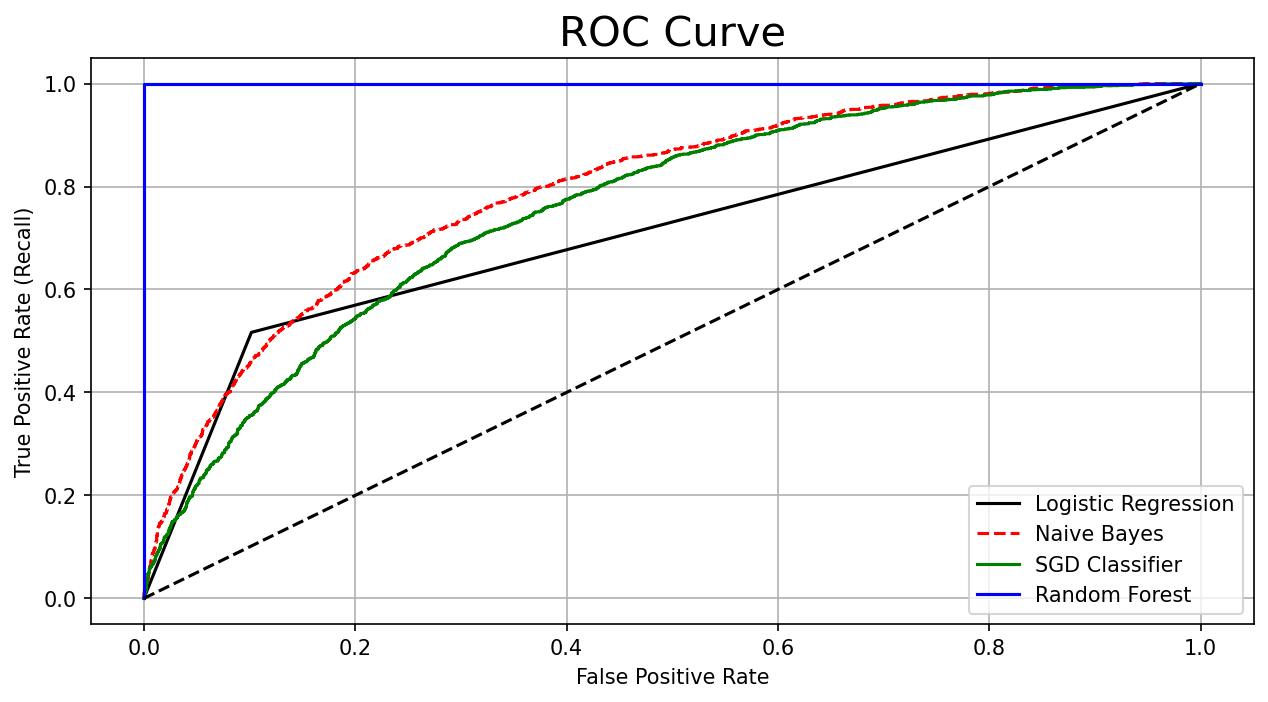

In [90]:
plt.plot(fpr_lr, tpr_lr,'k', label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, 'r--', label='Naive Bayes')
plt.plot(fpr_sgd, tpr_sgd,'g', label='SGD Classifier')
plt.plot(fpr_forest, tpr_forest, 'b', label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.grid()
plt.title("ROC Curve")
plt.show()


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [93]:
print(confusion_matrix(y_train, forest.predict(X_train)))

[[4138    0]
 [   0 1496]]


In [94]:
print(confusion_matrix(y_train, sgd.predict(X_train)))

[[3791  347]
 [1028  468]]


In [95]:
print(confusion_matrix(y_train, nb.predict(X_train)))

[[2843 1295]
 [ 379 1117]]


In [96]:
print(confusion_matrix(y_train, lr.predict(X_train)))

[[3717  421]
 [ 723  773]]


In [97]:
from sklearn.metrics import precision_recall_curve

In [101]:
score=sgd.decision_function(X_train)
precision, recall, thresholds=precision_recall_curve(y_train, score)

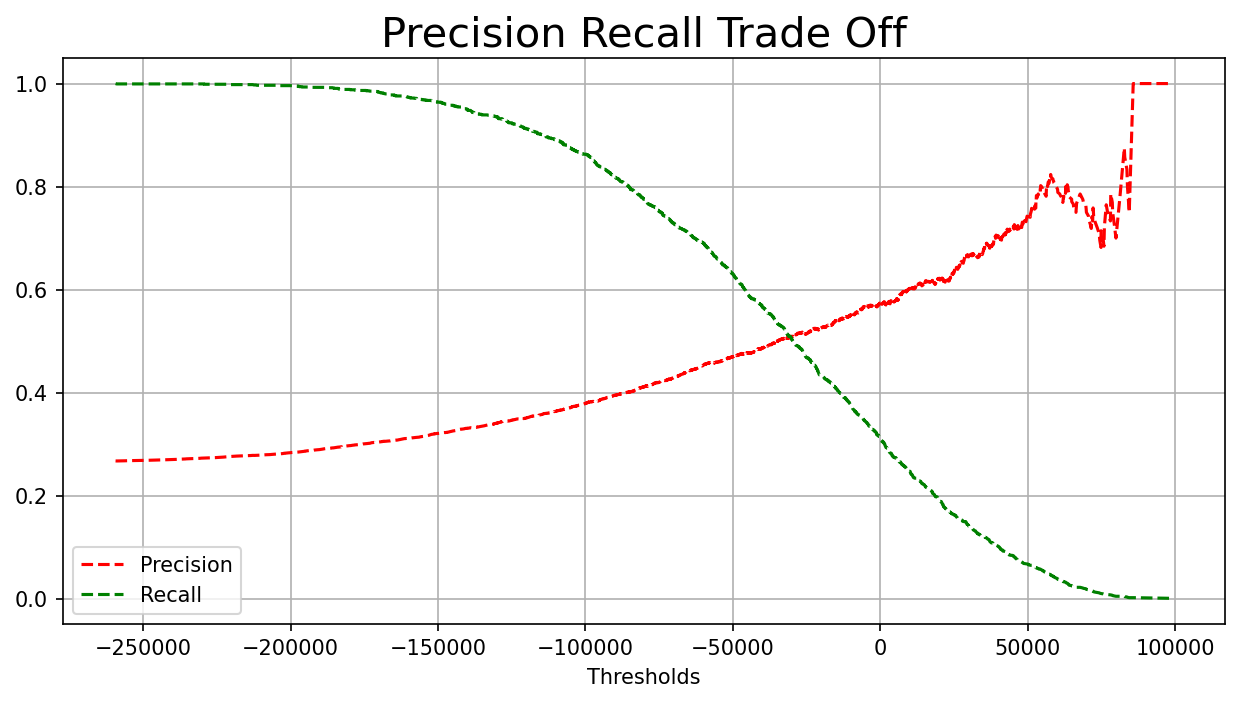

In [102]:
plt.plot(thresholds, precision[:-1], 'r--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g--', label='Recall')
plt.legend()
plt.title("Precision Recall Trade Off")
plt.grid()
plt.xlabel("Thresholds")
plt.show()


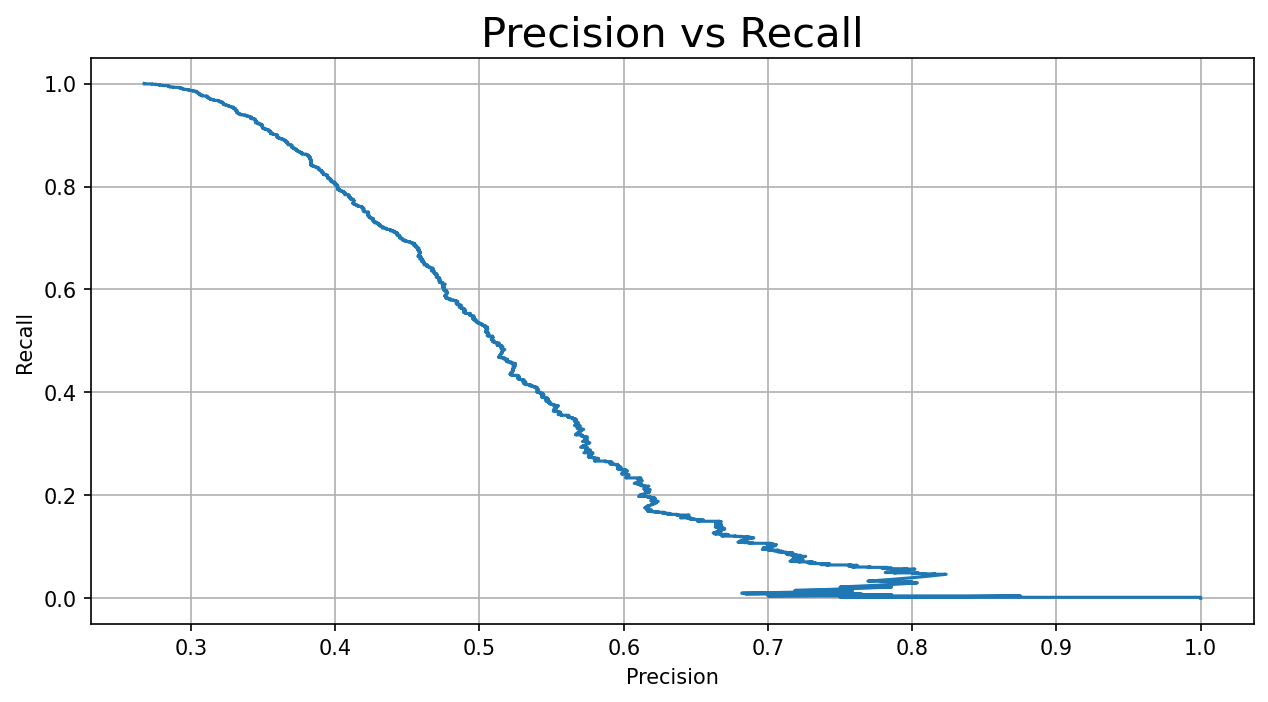

In [104]:
plt.title('Precision vs Recall')
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show
plt.grid()

## Evaluation of model

In [105]:
pred_lr=lr.predict(X_test)
pred_nb=nb.predict_proba(X_test)
pred_sgd=sgd.decision_function(X_test)
pred_forest=forest.predict_proba(X_test)

In [108]:
pred_lr

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
lr_prob=lr.predict_proba(X_test)
sgd_prob=sgd.predict(X_test)
nb_prob=nb.predict_proba(X_test)
forest_prob=nb.predict_proba(X_test)

In [121]:
sgd_prob

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
fpr_lr, tpr_lr, thres_lr=roc_curve(y_test, lr_prob[:,-1])
fpr_nb, tpr_nb, thres_nb=roc_curve(y_test, nb_prob[:,-1])
fpr_sgd, tpr_sgd, thres_sgd=roc_curve(y_test, sgd_prob)
fpr_forest, tpr_forest, thres_forest=roc_curve(y_test, forest_prob[:,-1])

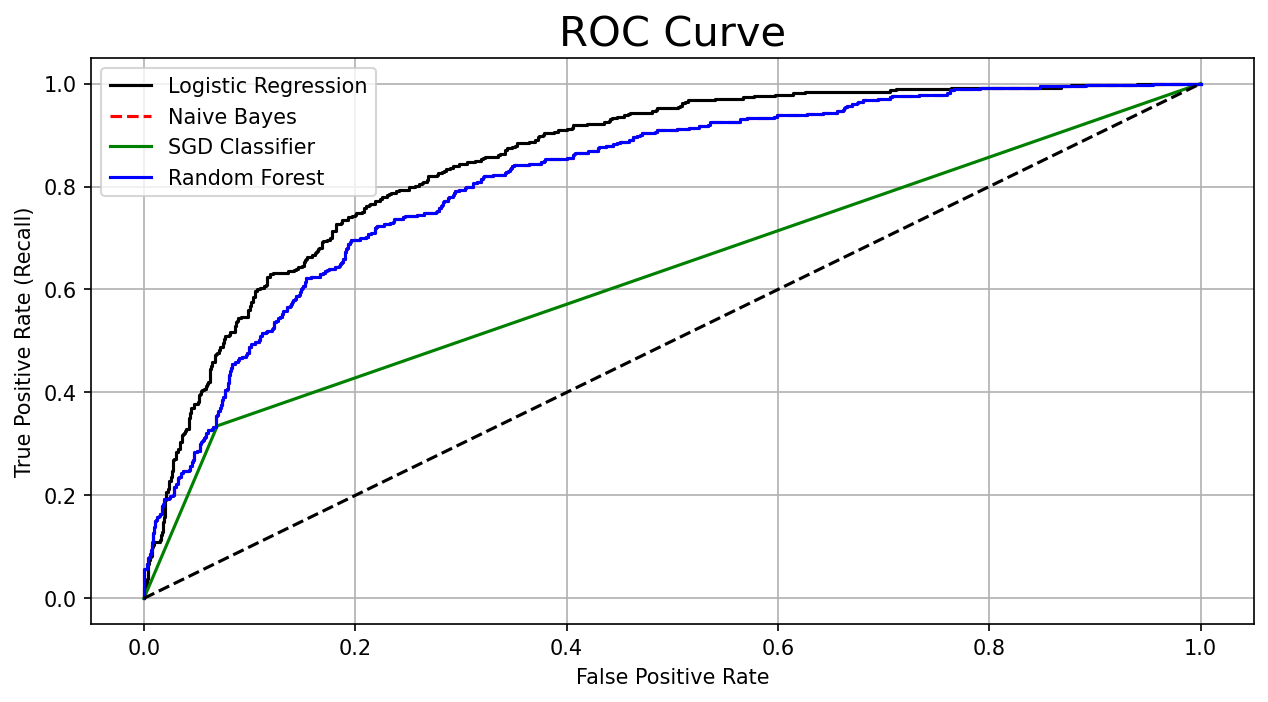

In [124]:
plt.plot(fpr_lr, tpr_lr,'k', label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, 'r--', label='Naive Bayes')
plt.plot(fpr_sgd, tpr_sgd,'g', label='SGD Classifier')
plt.plot(fpr_forest, tpr_forest, 'b', label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.grid()
plt.title("ROC Curve")
plt.show()